R2 score: 0.4620205338926685
Mean Absolute Error: 0.03090861598359967
Mean Squared Error: 0.0025448024695983824
Root Mean Squared Error: 0.05044603522179302


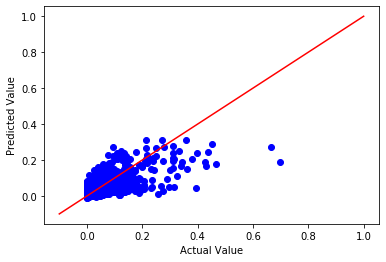

In [97]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, RFECV, f_regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.patches import mlines


contData = genfromtxt('contFeaturesNormed.csv', delimiter=',')
catData = genfromtxt('categoryFeatures.csv', delimiter=',', dtype=str, encoding='UTF-8')
labels = genfromtxt('normedLabels.csv', delimiter=',')

#remove first entry, is bugged for some reason
contData = np.delete(contData, 0,0)
catData = np.delete(catData, 0,0)
labels = np.delete(labels, 0,0)

#need to encode the categorical data
#gets the unique values for each column as lists
entry0 = np.unique(catData[:,0])
entry1 = np.unique(catData[:,1])
entry2 = np.unique(catData[:,2])
entry3 = np.unique(catData[:,3])
entry4 = np.unique(catData[:,4])
entry5 = np.unique(catData[:,5])
entry6 = np.unique(catData[:,6])
entry7 = np.unique(catData[:,7])
#set up the encoder, replace each cat column with its respective encoding
le = preprocessing.LabelEncoder()
#fits the encoder to use string values of the list we want it to
le.fit(entry0)
#transforms the strings to ints using the fitted values given before
catData[:,0] = le.transform(catData[:,0])

le = preprocessing.LabelEncoder()
le.fit(entry1)
catData[:,1] = le.transform(catData[:,1])

le = preprocessing.LabelEncoder()
le.fit(entry2)
catData[:,2] = le.transform(catData[:,2])

le = preprocessing.LabelEncoder()
le.fit(entry3)
catData[:,3] = le.transform(catData[:,3])

le = preprocessing.LabelEncoder()
le.fit(entry4)
catData[:,4] = le.transform(catData[:,4])

le = preprocessing.LabelEncoder()
le.fit(entry5)
catData[:,5] = le.transform(catData[:,5])

le = preprocessing.LabelEncoder()
le.fit(entry6)
catData[:,6] = le.transform(catData[:,6])
le = preprocessing.LabelEncoder()
le.fit(entry7)
catData[:,7] = le.transform(catData[:,7])
#normalize these new values, and convert them to floats because they are number strings
catData = catData.astype('float64')
catData = catData / catData.max(axis=0)

#combine the features back together, order is:  budget  company  cutcountry  director    cutgenre    cutrating     runtime    star     writer   month   year

data = np.append(contData[:,0].reshape(contData[:,0].shape[0],1),catData[:,[0,2]],1)
data = np.append(data, contData[:,1].reshape(contData[:,0].shape[0],1),1)
data = np.append(data, catData[:,[5,6,7]],1)
data = np.append(data, contData[:,2].reshape(contData[:,0].shape[0],1),1)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

reg = LinearRegression()

#reg = MLPRegressor(activation='relu', solver='adam', hidden_layer_sizes=(64,64), learning_rate='adaptive', learning_rate_init=.001)

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print('R2 score:', reg.score(X_test, y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred, color='blue')
x=np.linspace(-0.1,1,1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [98]:
#Ridge Regression

X = data
y = labels

alphas = 10**np.linspace(10,-2,100)*0.5
alphas
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 8)

In [100]:
# Split data
X_train2, X_test2 , y_train2, y_test2 = train_test_split(X, y, test_size=0.5, random_state=1)

R2 score: 0.4737567046196858
Mean Absolute Error: 0.04139047986923389
Mean Squared Error: 0.004227792247231099
Root Mean Squared Error: 0.0650214752772582


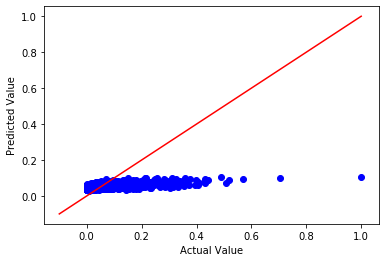

In [109]:
#Fit a reg onto training data, predict test data, calc mse
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train2, y_train2)             
pred2 = ridge2.predict(X_test2)           

print('R2 score:', reg.score(X_test2, y_test2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, pred2)))  

plt.scatter(y_test2, pred2, color='blue')
x=np.linspace(-0.1,1,1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

R2 score: 0.4737567046196858
Mean Absolute Error: 0.04640082564760353
Mean Squared Error: 0.005160501239123089
Root Mean Squared Error: 0.07183662881234816


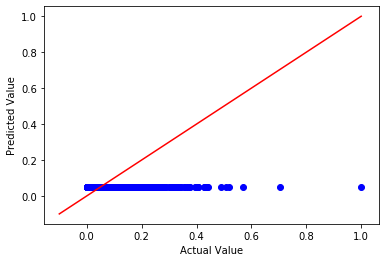

In [110]:
#Same as above
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train2, y_train2)             
pred3 = ridge3.predict(X_test2)           

print('R2 score:', reg.score(X_test2, y_test2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, pred3)))  

plt.scatter(y_test2, pred3, color='blue')
x=np.linspace(-0.1,1,1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

R2 score: 0.4737567046196858
Mean Absolute Error: 0.031673135164151975
Mean Squared Error: 0.0027321309235541474
Root Mean Squared Error: 0.05226978977912717


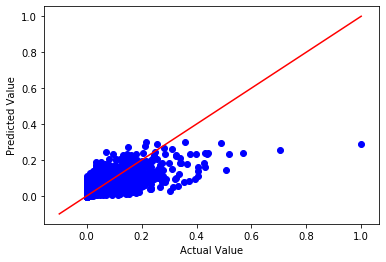

In [111]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train2, y_train2)             
pred = ridge2.predict(X_test2)            

print('R2 score:', reg.score(X_test2, y_test2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, pred)))  

plt.scatter(y_test2, pred, color='blue')
x=np.linspace(-0.1,1,1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

Mean Absolute Error: 0.03169220970645463
Mean Squared Error: 0.002733690247853547
Root Mean Squared Error: 0.052284703765571316


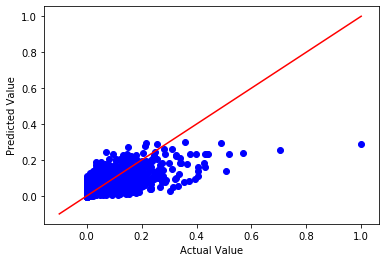

In [112]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train2, y_train2)
ridgecv.alpha_
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train2, y_train2)

#print('R2 score:', reg.score(ridge4.predict(X_test2), y_test2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, ridge4.predict(X_test2)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, ridge4.predict(X_test2)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, ridge4.predict(X_test2)))) 

plt.scatter(y_test2, ridge4.predict(X_test2), color='blue')
x=np.linspace(-0.1,1,1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [105]:
#LASSO

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train2), y_train2)
    coefs.append(lasso.coef_)

Mean Absolute Error: 0.03165005462764398
Mean Squared Error: 0.0027331523120945325
Root Mean Squared Error: 0.05227955921863279


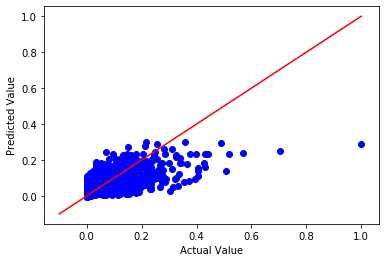

In [113]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train2, y_train2)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train2, y_train2)
mean_squared_error(y_test2, lasso.predict(X_test2))

lasso_pred = lassocv.predict(X_test2)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, lasso.predict(X_test2)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, lasso.predict(X_test2)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, lasso.predict(X_test2))))  

plt.scatter(y_test2, lasso.predict(X_test2), color='blue')
x=np.linspace(-0.1,1,1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()